Дана функция f(x) = -12x^4*sin(cos(x)) - 18x^3+5x^2 + 10x - 30
1. Определить корни
2. Найти интервалы, на которых функция возрастает
3. Найти интервалы, на которых функция убывает
4. Построить график
5. Вычислить вершину
6. Определить промежутки на которых f > 0
7. Определить промежутки на которых f < 0

In [1]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from scipy.optimize import root
from scipy.optimize import minimize


In [2]:
a, b, c, d, e = -12, -18, 5, 10, -30


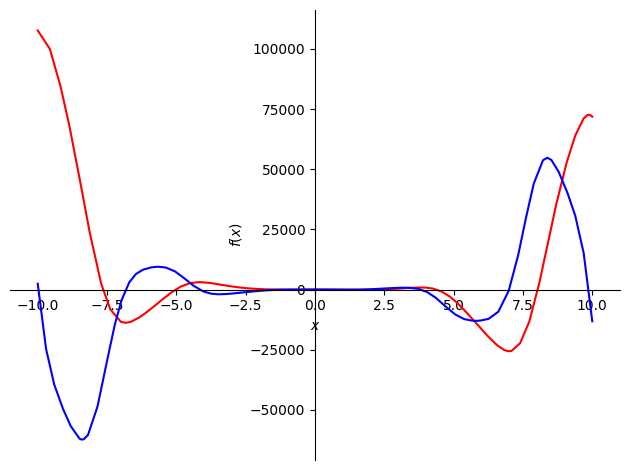

12*x**4*sin(x)*cos(cos(x)) - 48*x**3*sin(cos(x)) - 54*x**2 + 10*x + 10

In [3]:
# Находим производную функции и строим графики. Алгебраическое (символьное) решение не дало результат - solve(f).
x = sp.Symbol('x', real=True)
f = a*x**4*sp.sin(sp.cos(x)) + b*x**3 + c*x**2 + d*x - 30
f_der = f.diff(x)
pl1 = sp.plot(f, line_color='r', show=False)
pl2 = sp.plot(f_der, line_color='b', show=False)
pl1.extend(pl2)
pl1.show()
f_der


In [4]:
def func(x):
    return a*x**4*np.sin(np.cos(x)) + b*x**3 + c*x**2 + d*x + e


In [5]:
# Численный метод нахождения корней исходной функции с указанием приближенного корня x0 по графику
roots = []
for x0 in [-7, -5, -1, 2, 4, 8]:
    sol = root(func, x0)
    roots.append(sol.x[0])
    print(f'Корень равен: {sol.x[0]}, внутрення проверка метода: {sol.success}')


Корень равен: -7.650622285132742, внутрення проверка метода: True
Корень равен: -5.026865928206214, внутрення проверка метода: True
Корень равен: -1.3389666392771085, внутрення проверка метода: True
Корень равен: 2.2730568457562623, внутрення проверка метода: True
Корень равен: 4.38352369796896, внутрення проверка метода: True
Корень равен: 8.035164133413524, внутрення проверка метода: True


In [6]:
def func_der(x):
    return 12*x**4*np.sin(x)*np.cos(np.cos(x)) - 48*x**3*np.sin(np.cos(x)) - 54*x**2 + 10*x + 10


In [7]:
# Численный метод нахождения корней производной функции (минимумы/максимумы исходной) с указанием приближеного корня x0 по графику
roots_der = []
for x0 in [-7, -4, -1, 1, 2, 4, 7, 10]:
    sol = root(func_der, x0)
    roots_der.append(sol.x[0])
    print(f'Корень равен: {sol.x[0]}, внутрення проверка метода: {sol.success}')


Корень равен: -6.831370040000846, внутрення проверка метода: True
Корень равен: -4.167783523850484, внутрення проверка метода: True
Корень равен: -0.39267717993275, внутрення проверка метода: True
Корень равен: 0.45457356810878213, внутрення проверка метода: True
Корень равен: 1.700607277951214, внутрення проверка метода: True
Корень равен: 3.819310833382291, внутрення проверка метода: True
Корень равен: 7.001031658540948, внутрення проверка метода: True
Корень равен: 9.877149053972511, внутрення проверка метода: True


In [8]:
limit = 10
step = 0.01


In [9]:
x_row = np.arange(-limit, limit, step)


In [10]:
y = []
for item in x_row:
    y.append(func(item))


In [11]:
y_der = []
for item in x_row:
    y_der.append(func_der(item))


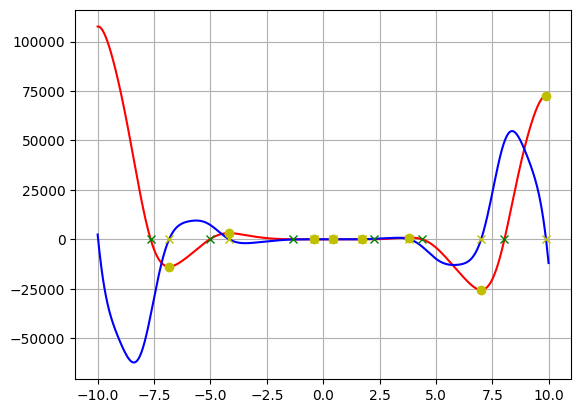

In [12]:
plt.plot(x_row, y, 'r')
plt.plot(x_row, y_der, 'b')
for item in roots:
    plt.plot(item, func(item), 'gx')
for item in roots_der:
    plt.plot(item, func(item), 'yo')
    plt.plot(item, func_der(item), 'yx')
plt.grid()


In [13]:
line_style = '-'
color = 'b'


In [14]:
def switch_line():
    global line_style
    if line_style == '-':
        line_style = '--'
    else:
        line_style = '-'
    return line_style


In [15]:
def switch_color():
    global color
    if color == 'b':
        color = 'r'
    else:
        color = 'b'
    return color


In [16]:
roots_all = [(-limit,'limit')]
for ir in roots:
    for ird in roots_der:
        if ir < ird and (ir, 'zero') not in roots_all and abs(ir) < limit and abs(ird) < limit:
            roots_all.append((ir, 'zero'))            
            roots_all.append((ird, 'dir'))
        elif ir > ird and (ird, 'dir') not in roots_all and abs(ird) < limit:
            roots_all.append((ird, 'dir'))
roots_all.append((limit,'limit'))
    

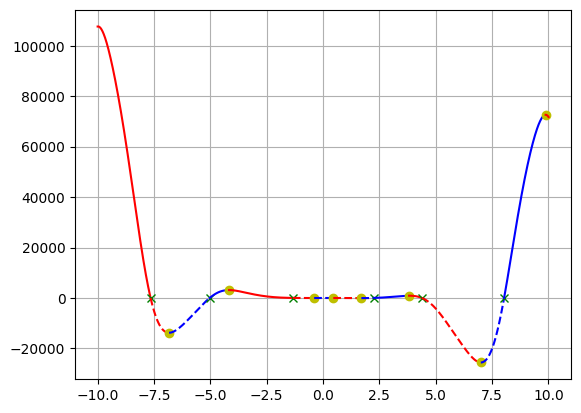

In [17]:
for i in range(len(roots_all) - 1):
    cur_x = np.arange(roots_all[i][0], roots_all[i+1][0] + step, step)
    if roots_all[i][1] == 'zero':
        plt.plot(roots_all[i][0], func(roots_all[i][0]), 'gx')
        plt.rcParams['lines.linestyle'] = switch_line()
        plt.plot(cur_x, func(cur_x), color)
    elif roots_all[i][1] == 'dir':
        plt.plot(roots_all[i][0], func(roots_all[i][0]), 'yo')
        plt.plot(cur_x, func(cur_x), switch_color())        
    else:
        plt.plot(cur_x, func(cur_x), switch_color())
plt.grid()

In [18]:
# Поиск минимума функции
# min_y = minimize(func, 7)
# print(min_y.x[0], min_y.fun, min_y.success)
# min_y


In [19]:
# Поиск максимума функции, через инвертирование функции
# max_y = minimize(lambda x: -func(x), 10)
# print(max_y.x[0], -max_y.fun, max_y.success)
# max_y
